In [3]:
import pandas as pd

df = pd.read_csv("advertising.csv")
print("Descriptive Statistics of the Advertising dataset")
display(df.describe().round(2))

Descriptive Statistics of the Advertising dataset


TV   radio  newspaper   sales
count  200.00  200.00     200.00  200.00
mean   147.04   23.26      30.55   14.02
std     85.85   14.85      21.78    5.22
min      0.70    0.00       0.30    1.60
25%     74.38    9.98      12.75   10.38
50%    149.75   22.90      25.75   12.90
75%    218.82   36.52      45.10   17.40
max    296.40   49.60     114.00   27.00

The Coefficients, a : 4.243028216036327 ,b : 0.04868787931904816


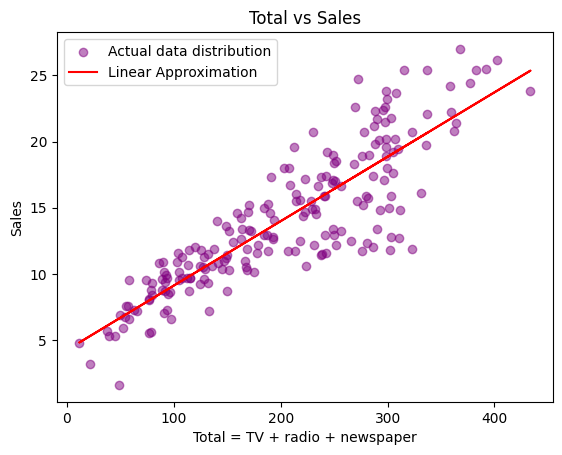

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def simple_linregressor(x,y):
    mx = np.mean(x)
    my = np.mean(y)

    Sxy = [(i - mx)*(j - my) for i,j in zip(x,y)]
    Sxx = [(i - mx)*(i - mx) for i in x]

    sxy = np.sum(Sxy)
    sxx = np.sum(Sxx)

    b1 = sxy/sxx
    b0 = my - b1*mx

    return [b0,b1]

df = pd.read_csv("advertising.csv")

total = (df["TV"] + df["radio"] + df["newspaper"]).to_numpy()
sales = df["sales"].to_numpy()

a,b = simple_linregressor(total,sales)

print("The Coefficients, a :",a,",b :",b)

y = np.array([a + b*i for i in total])

plt.scatter(total,sales,c="purple",alpha=0.5)
plt.plot(total,y,c="red")
plt.legend(["Actual data distribution","Linear Approximation"])
plt.title("Total vs Sales")
plt.xlabel("Total = TV + radio + newspaper")
plt.ylabel("Sales")
plt.show()


In [67]:
from sklearn.model_selection import train_test_split
import pandas as pd
from random import randint as r

df = pd.read_csv("advertising.csv")

train,test = train_test_split(df,test_size=0.3,random_state=r(0,100))
display(train.head())
display(train.head())

TV  radio  newspaper  sales
186  139.5    2.1       26.6   10.3
56     7.3   28.1       41.4    5.5
87   110.7   40.6       63.2   16.0
177  170.2    7.8       35.2   11.7
181  218.5    5.4       27.4   12.2

TV  radio  newspaper  sales
186  139.5    2.1       26.6   10.3
56     7.3   28.1       41.4    5.5
87   110.7   40.6       63.2   16.0
177  170.2    7.8       35.2   11.7
181  218.5    5.4       27.4   12.2

Degree: 3
R2 Score: 0.73821076757317
MAE: 1.992430170235013
RMSE: 2.527006714522366
Degree: 4
R2 Score: 0.7394866969165738
MAE: 1.9886389214084481
RMSE: 2.5208410287101737
Degree: 5
R2 Score: 0.7439813250865828
MAE: 1.9835777136851966
RMSE: 2.4990004178289342
Degree: 6
R2 Score: 0.745390651069995
MAE: 1.964050024218006
RMSE: 2.492112704584874
Degree: 7
R2 Score: 0.7417759623170086
MAE: 1.9674044459905398
RMSE: 2.5097406203902337
Degree: 8
R2 Score: 0.7360480807008197
MAE: 2.0438373759224806
RMSE: 2.5374232688859695
Degree: 9
R2 Score: 0.7311637394221853
MAE: 2.0774862321640013
RMSE: 2.5607927344957937
Degree: 10
R2 Score: 0.7276099623107195
MAE: 2.0912900318165213
RMSE: 2.57766287071063


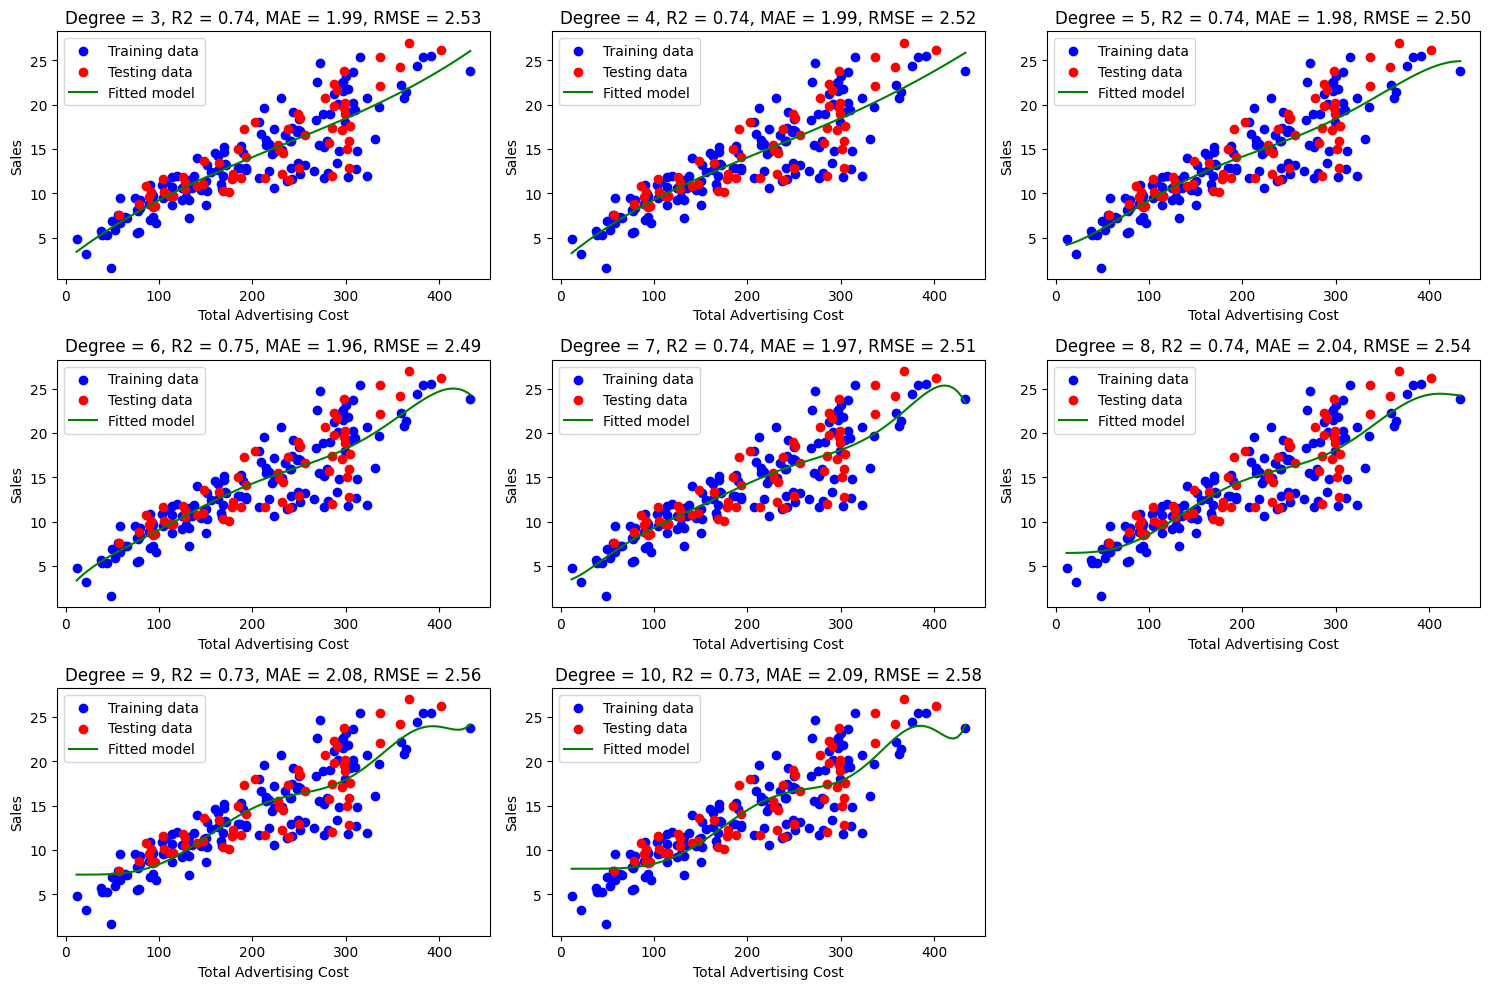

Best Degree in this state :  7
[13.51172572]


In [92]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from random import randint as r
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("advertising.csv")

train, test = train_test_split(df, test_size=0.3, random_state=45)
train["total"] = train["TV"] + train["newspaper"] + train["radio"]
X_train = train[["total"]].to_numpy()
y_train = train["sales"].to_numpy()

test["total"] = test["TV"] + test["newspaper"] + test["radio"]
X_test = test[["total"]].to_numpy()
y_test = test["sales"].to_numpy()

plt.figure(figsize=(15, 10))
degrees = list(range(3, 11))
r2_scores = []
mae_scores = []
rmse_scores = []

for i, degree in enumerate(degrees, 1):
    poly_features = PolynomialFeatures(degree=degree,include_bias=False)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    lin_reg = LinearRegression()
    lin_reg.fit(X_train_poly, y_train)

    y_pred = lin_reg.predict(X_test_poly)

    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)
    
    print("Degree:", degree)
    print("R2 Score:", r2)
    print("MAE:", mae)
    print("RMSE:", rmse)

    plt.subplot(3, 3, i)
    plt.scatter(X_train, y_train, color='blue', label='Training data')
    plt.scatter(X_test, y_test, color='red', label='Testing data')
    x_values = np.linspace(X_train.min(), X_train.max(), 100)
    x_values_poly = poly_features.transform(x_values.reshape(-1, 1))
    plt.plot(x_values, lin_reg.predict(x_values_poly), color='green', label='Fitted model')
    plt.title('Degree = {}, R2 = {:.2f}, MAE = {:.2f}, RMSE = {:.2f}'.format(degree, r2, mae, rmse))
    plt.xlabel('Total Advertising Cost')
    plt.ylabel('Sales')
    plt.legend()

plt.tight_layout()
plt.show()

print("Best Degree in this state : ",7)
poly_features = PolynomialFeatures(degree=degree,include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

X_tst_poly = poly_features.transform(np.array([[149+22+15]]))

yprd = lin_reg.predict(X_tst_poly)

print(yprd)



